In [1]:
#-----------------Import-----------------
import matplotlib.image as image
import matplotlib.pyplot as plt
import os
import sklearn as sk
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
im2 = image.imread('imgs/NORM/mdb004.pgm')

In [3]:
directoryN ='imgs/NORM/'
directoryI ='imgs/infected/'

nbimage = len(os.listdir(directoryN)) + len(os.listdir(directoryI))

imgs=np.zeros([im2.shape[0]*im2.shape[1]+1,nbimage])

i = 0

for filename in os.listdir(directoryN) : 
    im = image.imread(directoryN+filename)
    imgs[:-1,i]=im.reshape(im.shape[0]*im.shape[1])
    imgs[-1,i]=0
    i+=1

for filename in os.listdir(directoryI) : 
    im = image.imread(directoryI+filename)
    imgs[:-1,i]=im.reshape(im.shape[0]*im.shape[1])
    imgs[-1,i]=1
    i+=1

In [4]:
X=imgs[:-1,:]
y=imgs[-1,:]
X=np.transpose(X)

In [5]:
KNN = KNeighborsClassifier()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.45, random_state=0)


clf = KNN.fit(Xtrain, ytrain)
ypredit = clf.predict(Xtest)

In [6]:
accuracy_score(ytest, ypredit)

0.6

In [7]:
print(metrics.confusion_matrix(ytest, ypredit))

[[73 19]
 [39 14]]


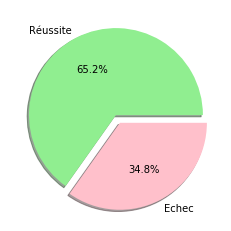

In [13]:
total = metrics.confusion_matrix(ytest, ypredit)[0][0] + metrics.confusion_matrix(ytest, ypredit)[1][0]
p = np.zeros(2)
p[0] = (metrics.confusion_matrix(ytest, ypredit)[0][0] / total) * 100
p[1] = (metrics.confusion_matrix(ytest, ypredit)[1][0] / total) * 100


plt.pie(p, labels=['Réussite', 'Echec'], colors=['lightgreen', 'pink'],
       shadow=True, autopct='%1.1f%%', explode=(0,0.1))
plt.savefig('cambiare.png')
plt.show()

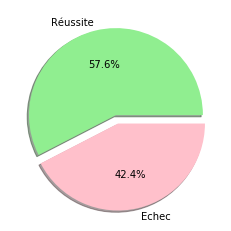

In [15]:
total = metrics.confusion_matrix(ytest, ypredit)[1][1] + metrics.confusion_matrix(ytest, ypredit)[0][1]
p = np.zeros(2)
p[0] = (metrics.confusion_matrix(ytest, ypredit)[0][1] / total) * 100
p[1] = (metrics.confusion_matrix(ytest, ypredit)[1][1] / total) * 100


plt.pie(p, labels=['Réussite', 'Echec'], colors=['lightgreen', 'pink'],
       shadow=True, autopct='%1.1f%%', explode=(0,0.1))
plt.savefig('cambiare22.png')
plt.show()